# Analysis

In [40]:
using AlgebraOfGraphics,
    CairoMakie
using DataFrames,
    DataFramesMeta,
    CategoricalArrays
using Arrow
using Statistics
import JSON

In [53]:
dim = 3
dir = "01_oblique_linear_alfven/dim_$(dim)_beta_0.25_theta_60"
try
    cd(dir)
    println("Changed to directory: $(dir)")
catch
end

# load simulation metadata (json)
meta = JSON.parsefile("sim_parameters.json")

SystemError: SystemError: opening file "sim_parameters.json": No such file or directory

In [42]:
meta["t_ci"]
meta["d_i"]

10628.186523164071

In [51]:
if meta["diag_format"] == "openpmd"

    field_diag_dir = "diags/diag1"
    field_diag_dir = "diags/diag2"
    
end
diag_format = meta["diag_format"]
ext = "arrow"
file_format = "$diag_format*.$ext"
file_format

"openpmd*.arrow"

In [52]:
unique(df.time)

101-element Vector{Union{Missing, Float64}}:
  0.0
  0.14289547011512838
  0.28579094023025675
  0.4286864103453851
  0.5715818804605135
  0.7144773505756419
  0.8573728206907703
  1.0002682908058986
  1.14316376092102
  1.2860592310361412
  ⋮
 13.146383250593026
 13.289278720708175
 13.432174190823325
 13.575069660938475
 13.717965131053624
 13.860860601168774
 14.003756071283924
 14.146651541399073
 14.289547011514223

In [45]:
files = filter(contains(r".*\.arrow"), readdir(field_diag_dir, join=true))
dfs = vcat(files .|> Arrow.Table .|> DataFrame)

df = reduce(vcat,dfs)

Base.IOError: IOError: readdir("diags/diag1"): no such file or directory (ENOENT)

In [46]:
B_fields = names(df, r"B")
E_field = names(df, r"E")
j_field = names(df, r"j")

variables = [B_fields; E_field; j_field]

9-element Vector{String}:
 "B_x"
 "B_y"
 "B_z"
 "E_x"
 "E_y"
 "E_z"
 "j_x"
 "j_y"
 "j_z"

In [48]:
# calculate the mean of the data by averaging over "y" and "z"
ids = [:z, :time]

function plot_fields(df, fields; ids=ids)
    temp_df = @chain df begin
        groupby(ids)
        combine(fields .=> mean, renamecols=false)
        stack(fields, ids)
    end

    plt = data(temp_df) * mapping(ids..., :value, row = :variable) * visual(Heatmap)
    draw(plt)
end

plot_fields (generic function with 1 method)

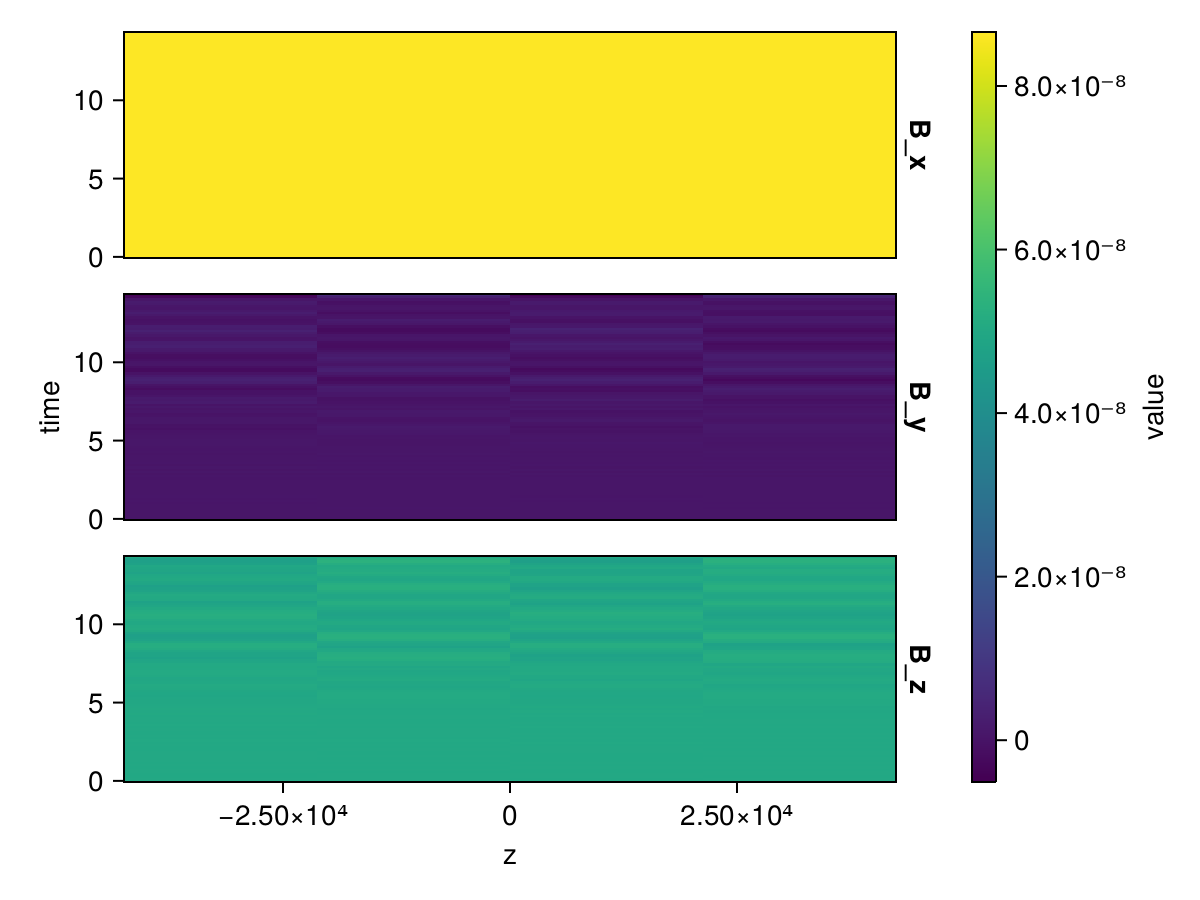

In [49]:
plot_fields(df, B_fields)

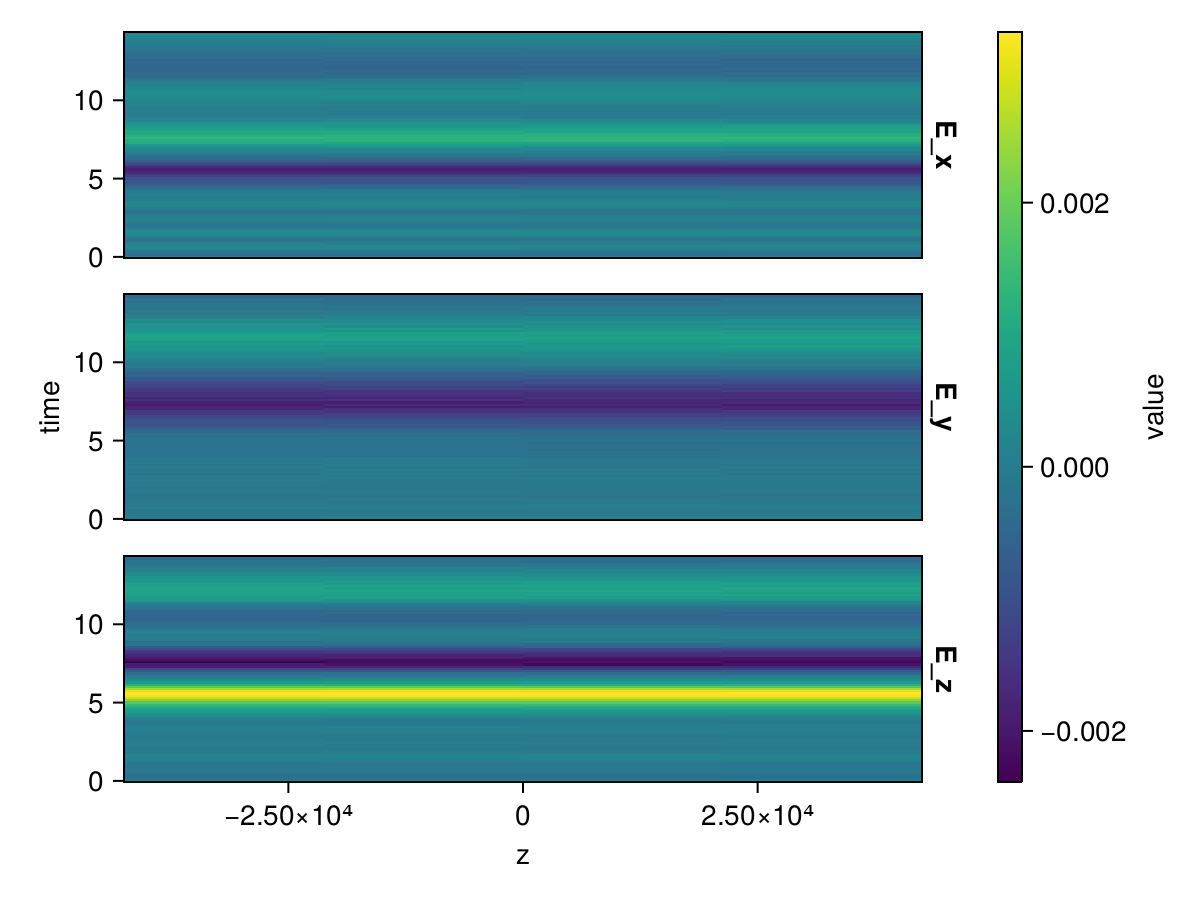

In [33]:
plot_fields(df, E_field)

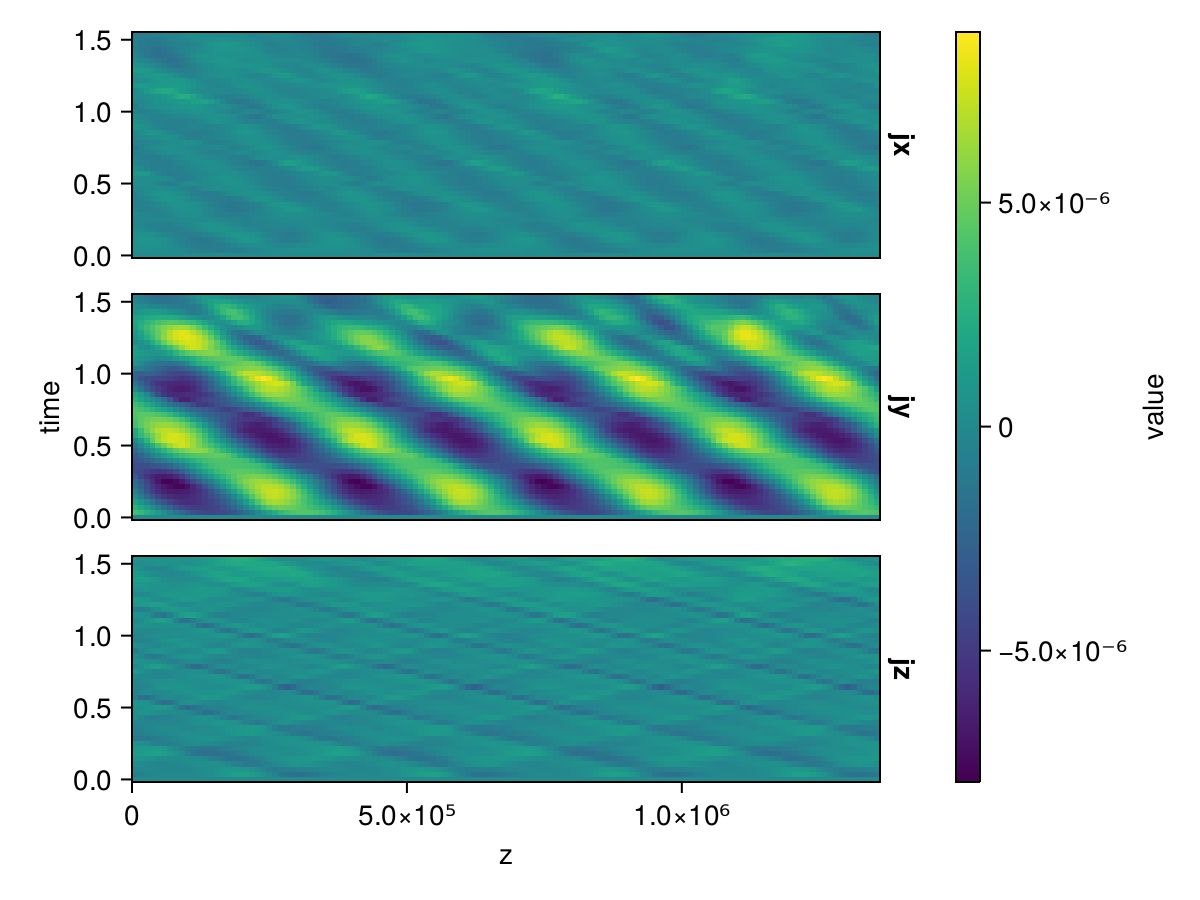

In [29]:
plot_fields(df, j_field)

## Fluid fields

In [30]:
file = "particle.arrow"
path = joinpath(dir, file)
df = path |> Arrow.Table |> DataFrame

Row,particle_position_z,particle_momentum_y,time,__index_level_0__
,Float64?,Float64?,Float64?,Int64?
1,1361.73,2.68171e-23,0.0,0
2,2439.99,-2.12413e-23,0.0,1
3,9193.6,1.83426e-23,0.0,2
4,2099.61,6.25404e-23,0.0,3
5,4741.6,2.26147e-23,0.0,4
6,10166.2,2.22307e-23,0.0,5
7,1487.59,1.73586e-23,0.0,6
8,6068.79,6.14796e-23,0.0,7
9,9367.07,4.3003e-24,0.0,8


In [44]:
df.z_norm = df.particle_position_z / meta["d_i"]
df.py_norm = df.particle_momentum_y / 1e-25

226492416-element Vector{Float64}:
  268.1711124573411
 -212.41275002261375
  183.42604391164087
  625.4040352925394
  226.14742113908036
  222.30727072338098
  173.58602915998517
  614.7961373786759
   43.002972521130644
  218.46257621720136
    ⋮
 -746.5462403962405
 -271.23447418955226
  594.043219263116
  159.94894555190038
  391.5216869275948
  330.20762116750456
  -53.8838611467182
 -216.43597886428884
  400.8417260423312

┌ Warning: No strict ticks found
└ @ PlotUtils /Users/zijin/.julia/packages/PlotUtils/jEGKP/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/zijin/.julia/packages/PlotUtils/jEGKP/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/zijin/.julia/packages/PlotUtils/jEGKP/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/zijin/.julia/packages/PlotUtils/jEGKP/src/ticks.jl:191


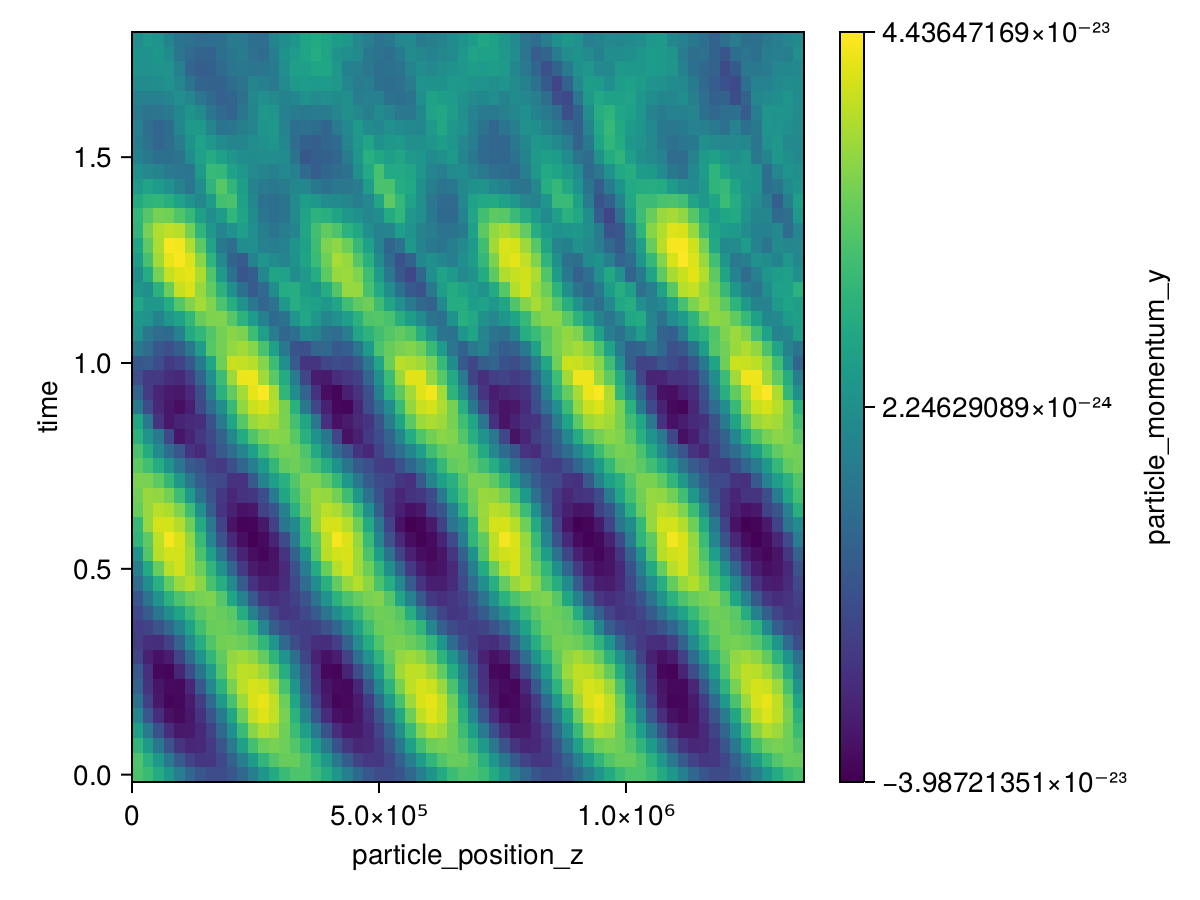

In [20]:
plt = data(df) * mapping(:particle_position_z, :time,:particle_momentum_y) * visual(Heatmap)
draw(plt)

### Non-binned particle data

In [45]:
using CategoricalArrays

In [54]:
df.time_norm = CategoricalArray(df.time ./ meta["t_ci"])

226492416-element CategoricalArray{Float64,1,UInt32}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 53.0
 53.0
 53.0
 53.0
 53.0
 53.0
 53.0
 53.0
 53.0

In [46]:
z_norm_edge = 0:1:240
py_norm_edge = -1e3:10:1e3

-1000.0:10.0:1000.0

In [57]:
datalimits_f = x -> quantile(x, [0.05, 0.95])

#11 (generic function with 1 method)

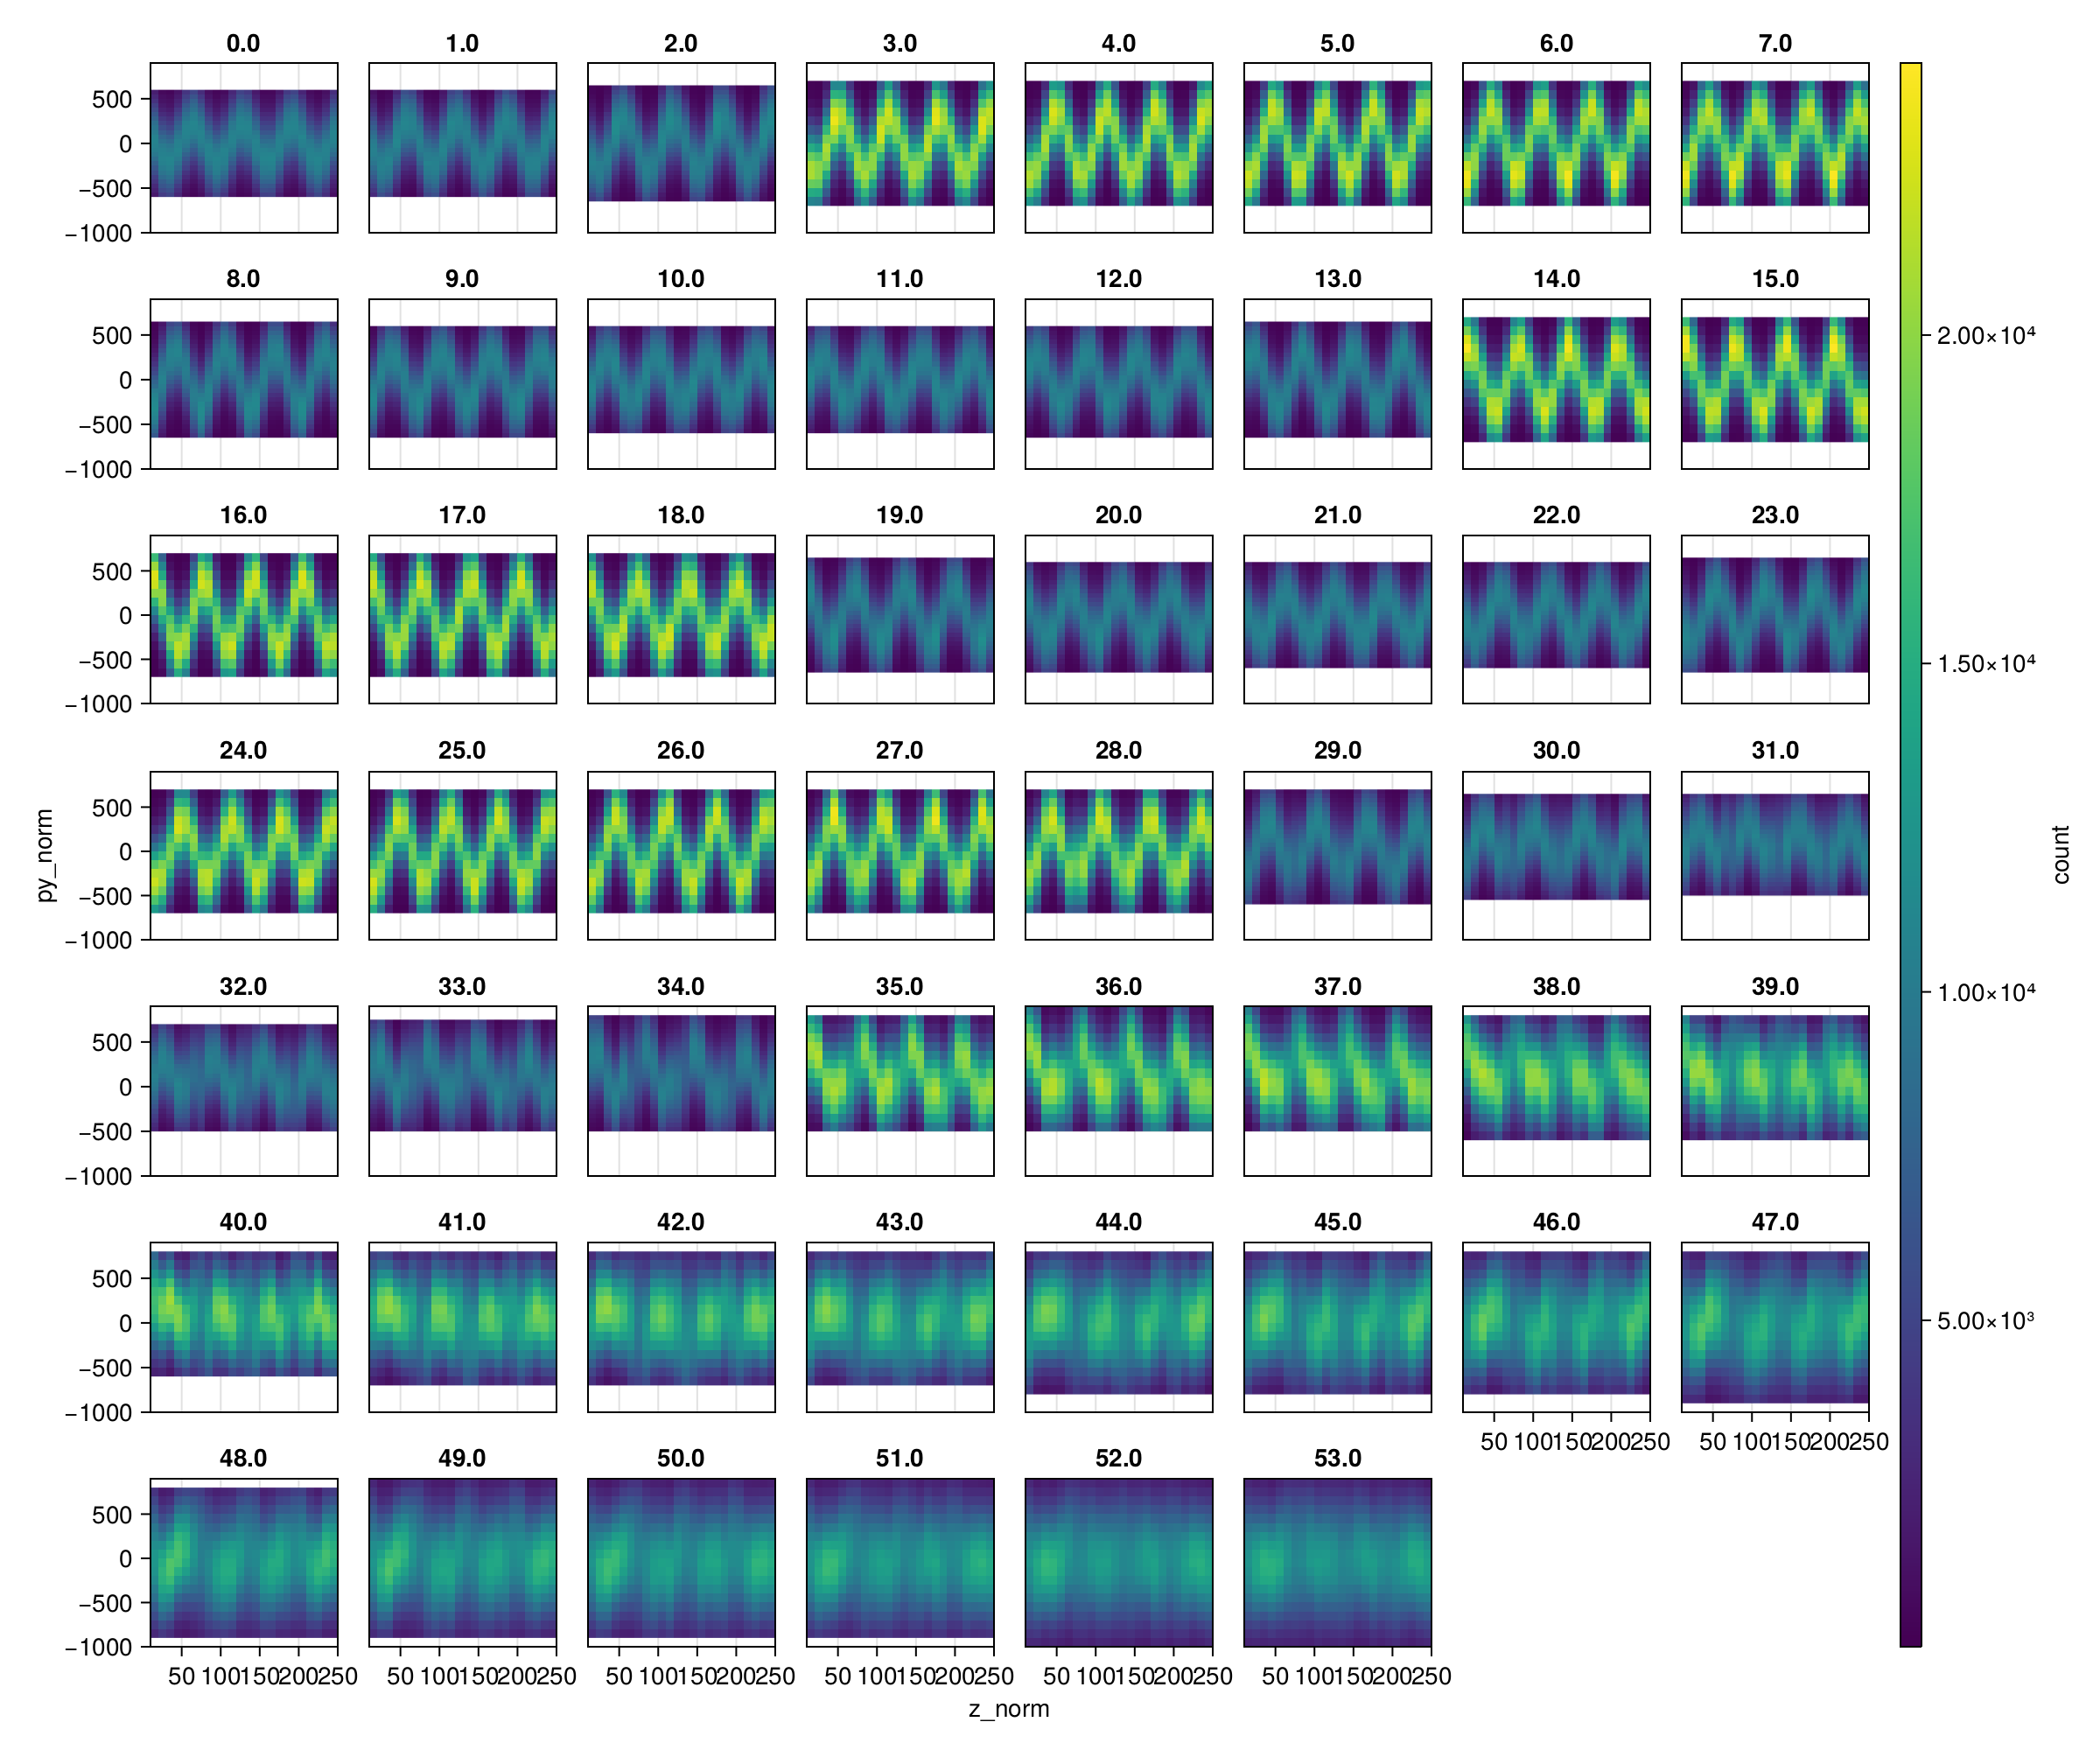

In [58]:
fig_options = (size = (1200, 1000),)

plt = data(df) * mapping(:z_norm, :py_norm, layout=:time_norm) * histogram(datalimits=datalimits_f)
p = draw(plt; figure = fig_options)

## Parameters

In [3]:
using Pkg
Pkg.add("Symbolics")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


In [ ]:
using Symbolics

In [12]:
@variables t x y μ_0 B ρ c n q m ϵ_0

Alfven_speed = B / sqrt(μ_0 * ρ)

# plasma frequency
ω_p = sqrt(n * q / (m * ϵ_0))
# inertial_length
d_i = c / ω_p

# gryofrequency
ω_c = q * B / m


simplify(ω_c / ω_p)

(B*q) / (m*sqrt((n*q) / (m*ϵ_0)))

In [13]:
ω_c / ω_p

(B*q) / (m*sqrt((n*q) / (m*ϵ_0)))